In [39]:
%%capture
%run shared.ipynb

import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=18) 
plt.rc('figure', figsize=(10,8))

In [40]:
print(len(df.Orienteringer.unique()))

154


# Demografi - kjønnsidentitet og seksuell/romantisk orientering

### "Infinite diversity in infinite combinations"

In [52]:
#Example multiple conditions

print('* Blant', len(alle_skeive), "respondenter, er det totalt", len(df.Orienteringer.unique()), 'unikt sammensatte seksuelle og romantiske orienteringer')

annen_RO = df[df.Annen_RO.isin(["Y"]) & ~df.Annen_RO.isna()]
søkende_RO = df[df.Annen_RO.isin(["SU"]) & ~df.Annen_RO.isna()]
sRO = len(søkende_RO)
aRO = len(annen_RO)
alle = len(alle_skeive)

print(f"* {aRO/alle:.0%} har en romantisk orientering som er forskjellig fra seksuell orienteringen sin")
print(f"* Ytterlige {sRO/alle:.0%} sier seg søkende/usikker på om de har en annen romantisk orientering")
len(one_O)/len(alle_skeive)

* Blant 642 respondenter, er det totalt 154 unikt sammensatte seksuelle og romantiske orienteringer
* 17% har en romantisk orientering som er forskjellig fra seksuell orienteringen sin
* Ytterlige 10% sier seg søkende/usikker på om de har en annen romantisk orientering


0.43457943925233644

# Hvordan beskriver folk kjønnsidentiteten sin?

### Først måtte alle velge en grov kategori for kjønnsidentiteten sin. 

In [42]:
gender_keys = {
    "nonbinary" : (nonbinary, "'ikke-binær'"),
    "men" : (s_men, "'mann'"),
    "women" : (s_women, "'kvinne'"),
    "questioning" : (questioning, "'søkende/usikker'"),
    "none" : (none, "'ingen av disse grove kategoriene passer; jeg har en annen kjønnsidentitet'"),
}

def print_respondent_genders(gender):
    gender, gender_label = gender_keys[gender]
    print (f"* {len(gender)/len(alle_skeive):.0%} valgte kategorien {gender_label} (n = {len(gender)})")

for gender in gender_keys.keys():
    print_respondent_genders(gender)


* 17% valgte kategorien 'ikke-binær' (n = 108)
* 23% valgte kategorien 'mann' (n = 148)
* 55% valgte kategorien 'kvinne' (n = 350)
* 11% valgte kategorien 'søkende/usikker' (n = 68)
* 2% valgte kategorien 'ingen av disse grove kategoriene passer; jeg har en annen kjønnsidentitet' (n = 14)


### Etterpå fikk respondentene mulighet til å beskrive kjønnsidentiteten sin med egne ord. 
#### Dette var noen av ordene folk brukte:

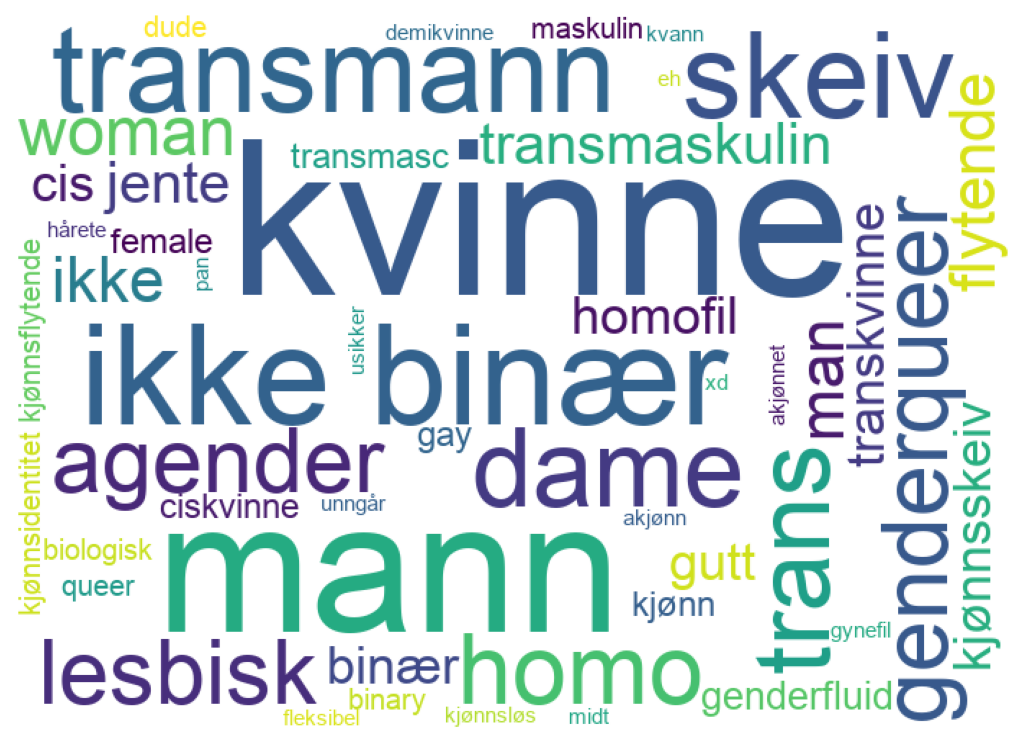

In [43]:
from IPython import display
display.set_matplotlib_formats('retina')

comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.update(["og", "hovedsaklig", "ord", "så", "la", "pisspriek", "gender", "jeg", "paraplyen", "de", "ikkje", "hun", "av", "liker", "oftest", "skulle", "komfortabel", "forskjell", "hatt", "betegnelsen", "fleste", "noe", "gjerne", "føler", "ute", "større", "utgjør", "meir", "enn", "til", "å", "merker", "tviler", "Gul", "ulin", "beskrive", "være", "selv", "non", "mitt", "tror", "heller", "meg", "engelsk", "ganske", "livet", "en", "også", "prøver", "eller", "på", "bare", "enten", "er", "norsk", "mer", "vanleg", "går", "detalj", "som", "men", "eigen", "egen", "eget", "den", "det", "mellom"])
  
# iterate through the csv file 
for val in alle_skeive.KID_egne_ord.dropna(): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 700, height = 500, 
                background_color ='white', colormap = 'viridis',
                stopwords = stopwords, 
                font_path='/Library/Fonts/Arial.ttf', min_font_size = 15, max_font_size = 150, max_words = 50).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Hvordan beskriver folk orienteringen sin?

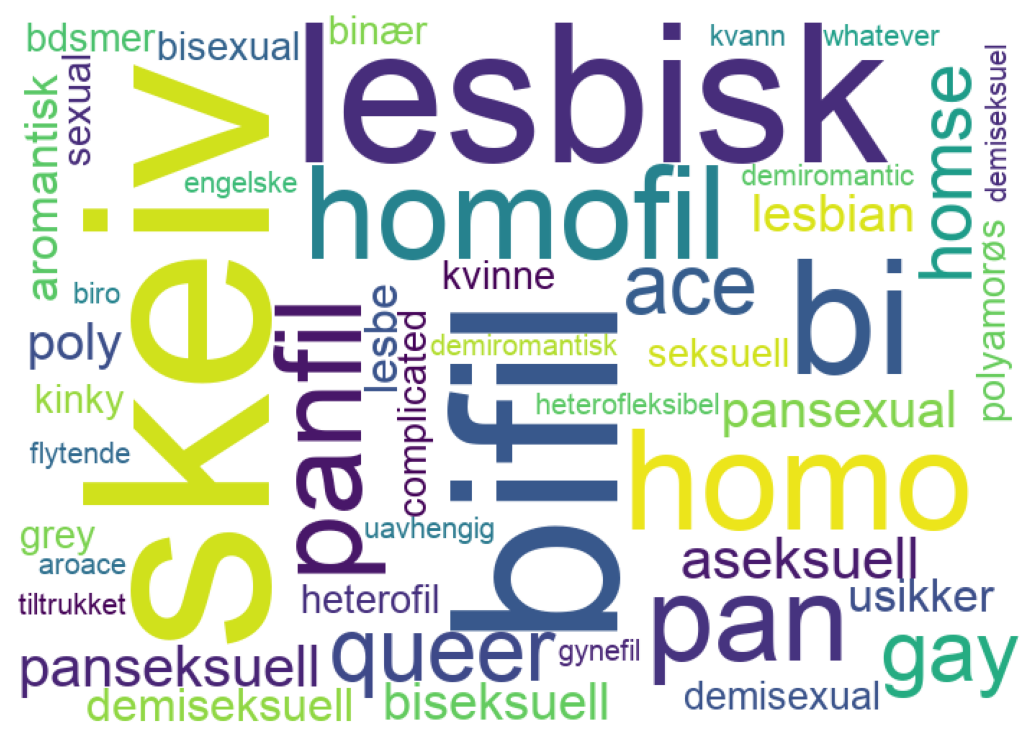

In [44]:
comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.update(["og", "hovedsaklig", "kontekst", "vet", "har", "mostly", "sjelden", "kvinner", "forelsker", "kjønn", "greit", "ekvivalenter", "person", "nød", "anførselstegn", "om,", "fordi", "beskriver", "ikke", "helt", "jeg", "liker", "om", "tiltrekkes", "ett", "pleier", "orientering", "vært", "bruke", "sier", "el", "ganger", "kan", "lever", "noen", "må", "skapet", "av", "regel", "klart", "med", "etc", "spørs", "funker", "preferanse", "dekkende", "ord", "så", "la", "pisspriek", "paraplyen", "de", "oftest", "skulle", "komfortabel", "forskjell", "hatt", "betegnelsen", "fleste", "noe", "gjerne", "føler", "ute", "større", "utgjør", "meir", "enn", "til", "å", "merker", "tviler", "Gul", "ulin", "beskrive", "være", "selv", "non", "mitt", "tror", "heller", "meg", "engelsk", "ganske", "livet", "en", "også", "prøver", "eller", "på", "bare", "enten", "er", "norsk", "mer", "vanleg", "går", "detalj", "som", "men", "eigen", "egen", "eget", "den", "det", "mellom"])
  
# iterate through the csv file 
for val in alle_skeive.SO_egne_ord.dropna(): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 700, height = 500, 
                background_color ='white', colormap = 'viridis',
                stopwords = stopwords, 
                font_path='/Library/Fonts/Arial.ttf', min_font_size = 20, max_font_size = 180, max_words = 85).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Overlappende identiteter

Respondenter fikk ubegrenset mulighet til å krysse av ved flere ulike seksuelle og romantiske orienteringer. Dette betyr at ingen av gruppene som er gruppert etter orientering ut fra LHBTIQ+-begrepet (lesbiske, homofile, bifile+, skeive og aseksuelle) er gjensidig utelukkende, og det er en del overlapp mellom alle gruppene. 

Nedenfor ser du et eksempel med tre tilfeldig utvalgte orienteringer. 

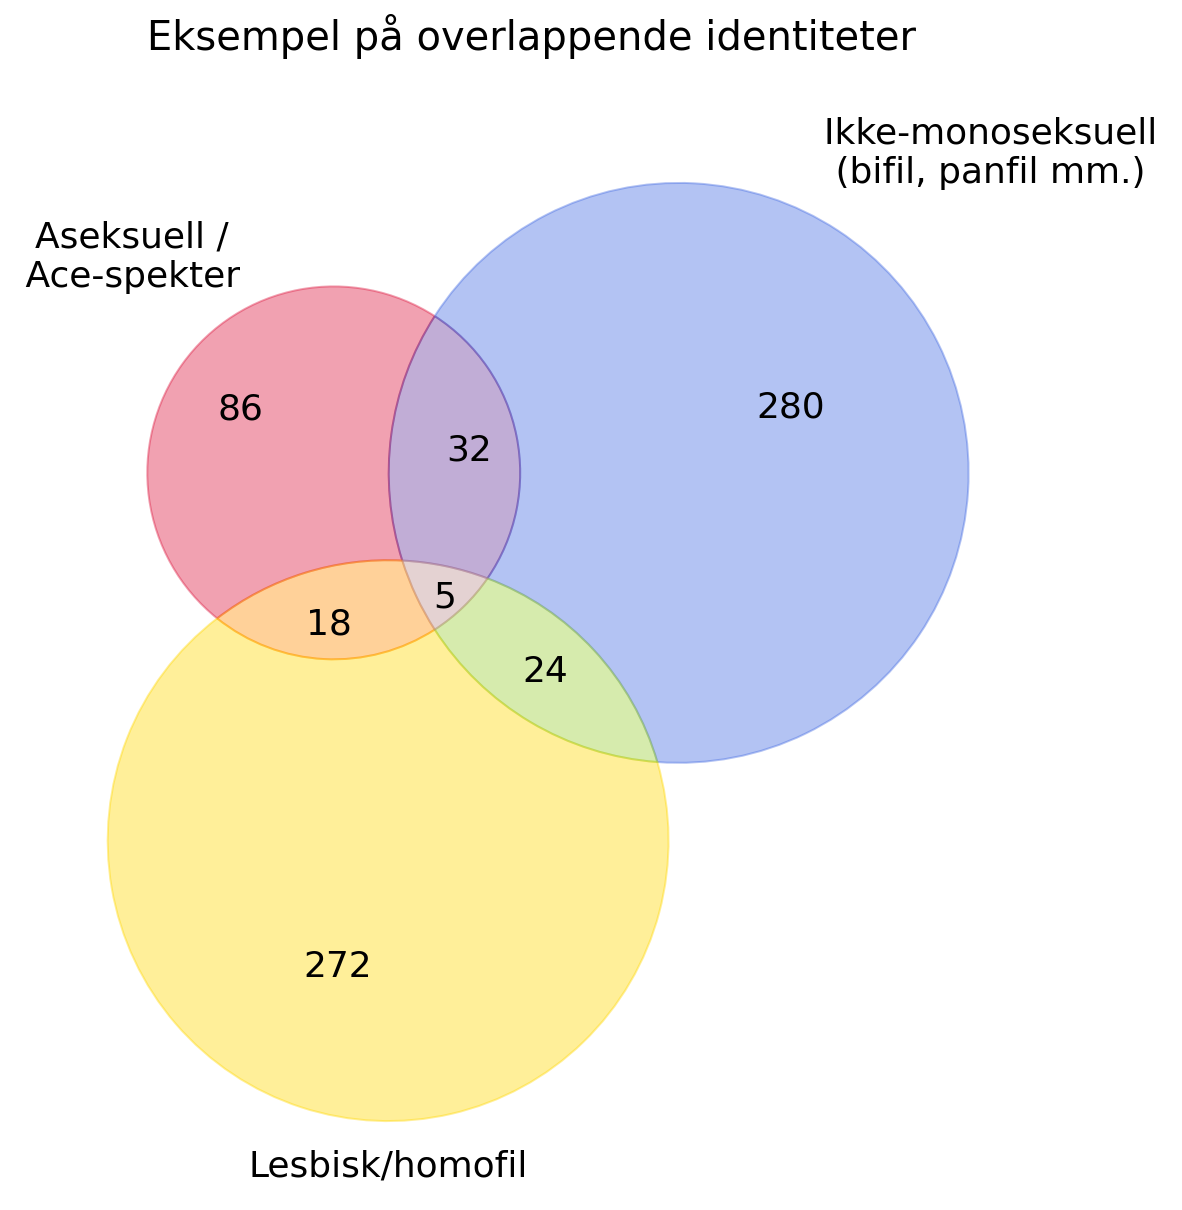

In [45]:
ace_venn = sum(df.Seksuell_orientering.str.contains("Ace"))
bi_venn = sum(df.Seksuell_orientering.str.contains("Bi"))
top_int = (df.Seksuell_orientering.str.contains("Ace") & df.Seksuell_orientering.str.contains("Bi")).sum()
queer_venn = sum(df.Seksuell_orientering.str.contains("Q"))
left_int = (df.Seksuell_orientering.str.contains("Ace") & df.Seksuell_orientering.str.contains("LG")).sum()
right_int = (df.Seksuell_orientering.str.contains("Bi") & df.Seksuell_orientering.str.contains("LG")).sum()
middle_int = (df.Seksuell_orientering.str.contains("Bi") & df.Seksuell_orientering.str.contains("LG") & df.Seksuell_orientering.str.contains("Ace")).sum()
gay_venn = sum(df.Seksuell_orientering.str.contains("LG"))

plt.figure(figsize=(10,10))
c = venn3(subsets = (ace_venn, bi_venn, top_int, gay_venn, left_int, right_int, middle_int), set_labels = ('Aseksuell / \n Ace-spekter', 'Ikke-monoseksuell \n (bifil, panfil mm.)', 'Lesbisk/homofil')) # 7-element list of subset sizes
c.get_patch_by_id('100').set_color('Crimson')
c.get_patch_by_id('010').set_color('RoyalBlue')
c.get_patch_by_id('001').set_color('Gold')
c.get_patch_by_id('110').set_color('RebeccaPurple')
c.get_patch_by_id('011').set_color('YellowGreen')
c.get_patch_by_id('101').set_color('DarkOrange')
c.get_patch_by_id('111').set_color('RosyBrown')


#c.get_label_by_id("011").set_x(0.08)
#c.get_label_by_id("100").set_x(-0.4)
#c.get_label_by_id("100").set_y(0.2)
#c.get_label_by_id("010").set_y(0.3)
#c.get_label_by_id("010").set_x(0.25)
#c.get_label_by_id("001").set_x(-0.1)
#c.get_label_by_id("001").set_y(-0.4)
#c.get_label_by_id("101").set_y(0.005)
#c.get_label_by_id("111").set_x(-0.145)
c.get_label_by_id("111").set_y(0.03)

#c.get_patch_by_id('01').set_alpha(1.3)
plt.title("Eksempel på overlappende identiteter \n", fontsize=20)
for text in c.set_labels:
    text.set_fontsize(18)
for text in c.subset_labels:
    text.set_fontsize(18)
plt.show()
#the first element is the size of the set on the left
#the second element is the size of the set on the right
#the third element is the size of the overlap between the left and right sets
#the fourth element is the size of the set on the bottom
#the fifth element is the size of the overlap between the left and bottom sets
#the sixth element is the size of the overlap between the right and bottom sets
#and the seventh element is the size of the overlap between all three sets.

In [46]:
print((df.Seksuell_orientering.str.contains("Bi") & df.Seksuell_orientering.str.contains("Q")).sum()/sum((df.Seksuell_orientering.str.contains("Bi"))))

print(".")

print((df.Seksuell_orientering.str.contains("LG") & df.Seksuell_orientering.str.contains("Q")).sum()/sum((df.Seksuell_orientering.str.contains("LG"))))

print(".")

print((df.Seksuell_orientering.str.contains("Ace") & df.Seksuell_orientering.str.contains("Q")).sum()/sum((df.Seksuell_orientering.str.contains("Ace"))))

print(".")

print((df.Seksuell_orientering.str.contains("Fluid") & df.Seksuell_orientering.str.contains("Q")).sum()/sum((df.Seksuell_orientering.str.contains("Fluid"))))
print(".")
print((df.Seksuell_orientering.str.contains("Q") & df.Seksuell_orientering.str.contains("LG")).sum()/sum((df.Seksuell_orientering.str.contains("Q"))))
print((df.Seksuell_orientering.str.contains("Q") & df.Seksuell_orientering.str.contains("Ace")).sum()/sum((df.Seksuell_orientering.str.contains("Q"))))
print((df.Seksuell_orientering.str.contains("Q") & df.Seksuell_orientering.str.contains("Q")).sum()/sum((df.Seksuell_orientering.str.contains("Q"))))
print((df.Seksuell_orientering.str.contains("Q") & df.Seksuell_orientering.str.contains("NONE")).sum()/sum((df.Seksuell_orientering.str.contains("Q"))))
print((df.Seksuell_orientering.str.contains("Q") & df.Seksuell_orientering.str.contains("Fluid")).sum()/sum((df.Seksuell_orientering.str.contains("Q"))))
print((df.Seksuell_orientering.str.contains("Q") & df.Seksuell_orientering.str.contains("Bi")).sum()/sum((df.Seksuell_orientering.str.contains("Q"))))

0.46785714285714286
.
0.3382352941176471
.
0.36046511627906974
.
0.5342465753424658
.
0.3484848484848485
0.11742424242424243
1.0
0.01893939393939394
0.14772727272727273
0.4962121212121212


^Analysis: People are more likely to select 'queer' the further they are from homo/heteronormativity
From less to more: LG, Ace, Bi, Fluid. Largest absolute overlap between bi & queer (49,6% of those who selected Queer also selected Bi+ N = 131)

In [47]:
#Format decimal as percentage
queer_frac = (sum(df.Seksuell_orientering.str.contains("Q"))/len(alle_skeive))
print (f"{queer_frac:.1%}")

41.1%


-------------------------
# Overall tilfredshet med folkebibliotek blant ulike grupper

### Q: "Alt i alt, i hvor stor grad tilfredsstiller tjenestene og tilbudet ved folkebiblioteket du bruker oftest dine behov og ønsker som [skeiv/LHBTIQ+-]* bibliotekbruker? (inkl. samlingen, retningslinjer, arrangementer m.m.)"

*Cis-heterofiles spørsmål manglet frasen i skarpe klammer.

In [48]:
print("Skala: 1 = i svært liten grad, 7 = i svært stor grad")
print("Varme farger = mer negativ enn nøytral, kalde farger = mer positiv enn nøytral")

Skala: 1 = i svært liten grad, 7 = i svært stor grad
Varme farger = mer negativ enn nøytral, kalde farger = mer positiv enn nøytral


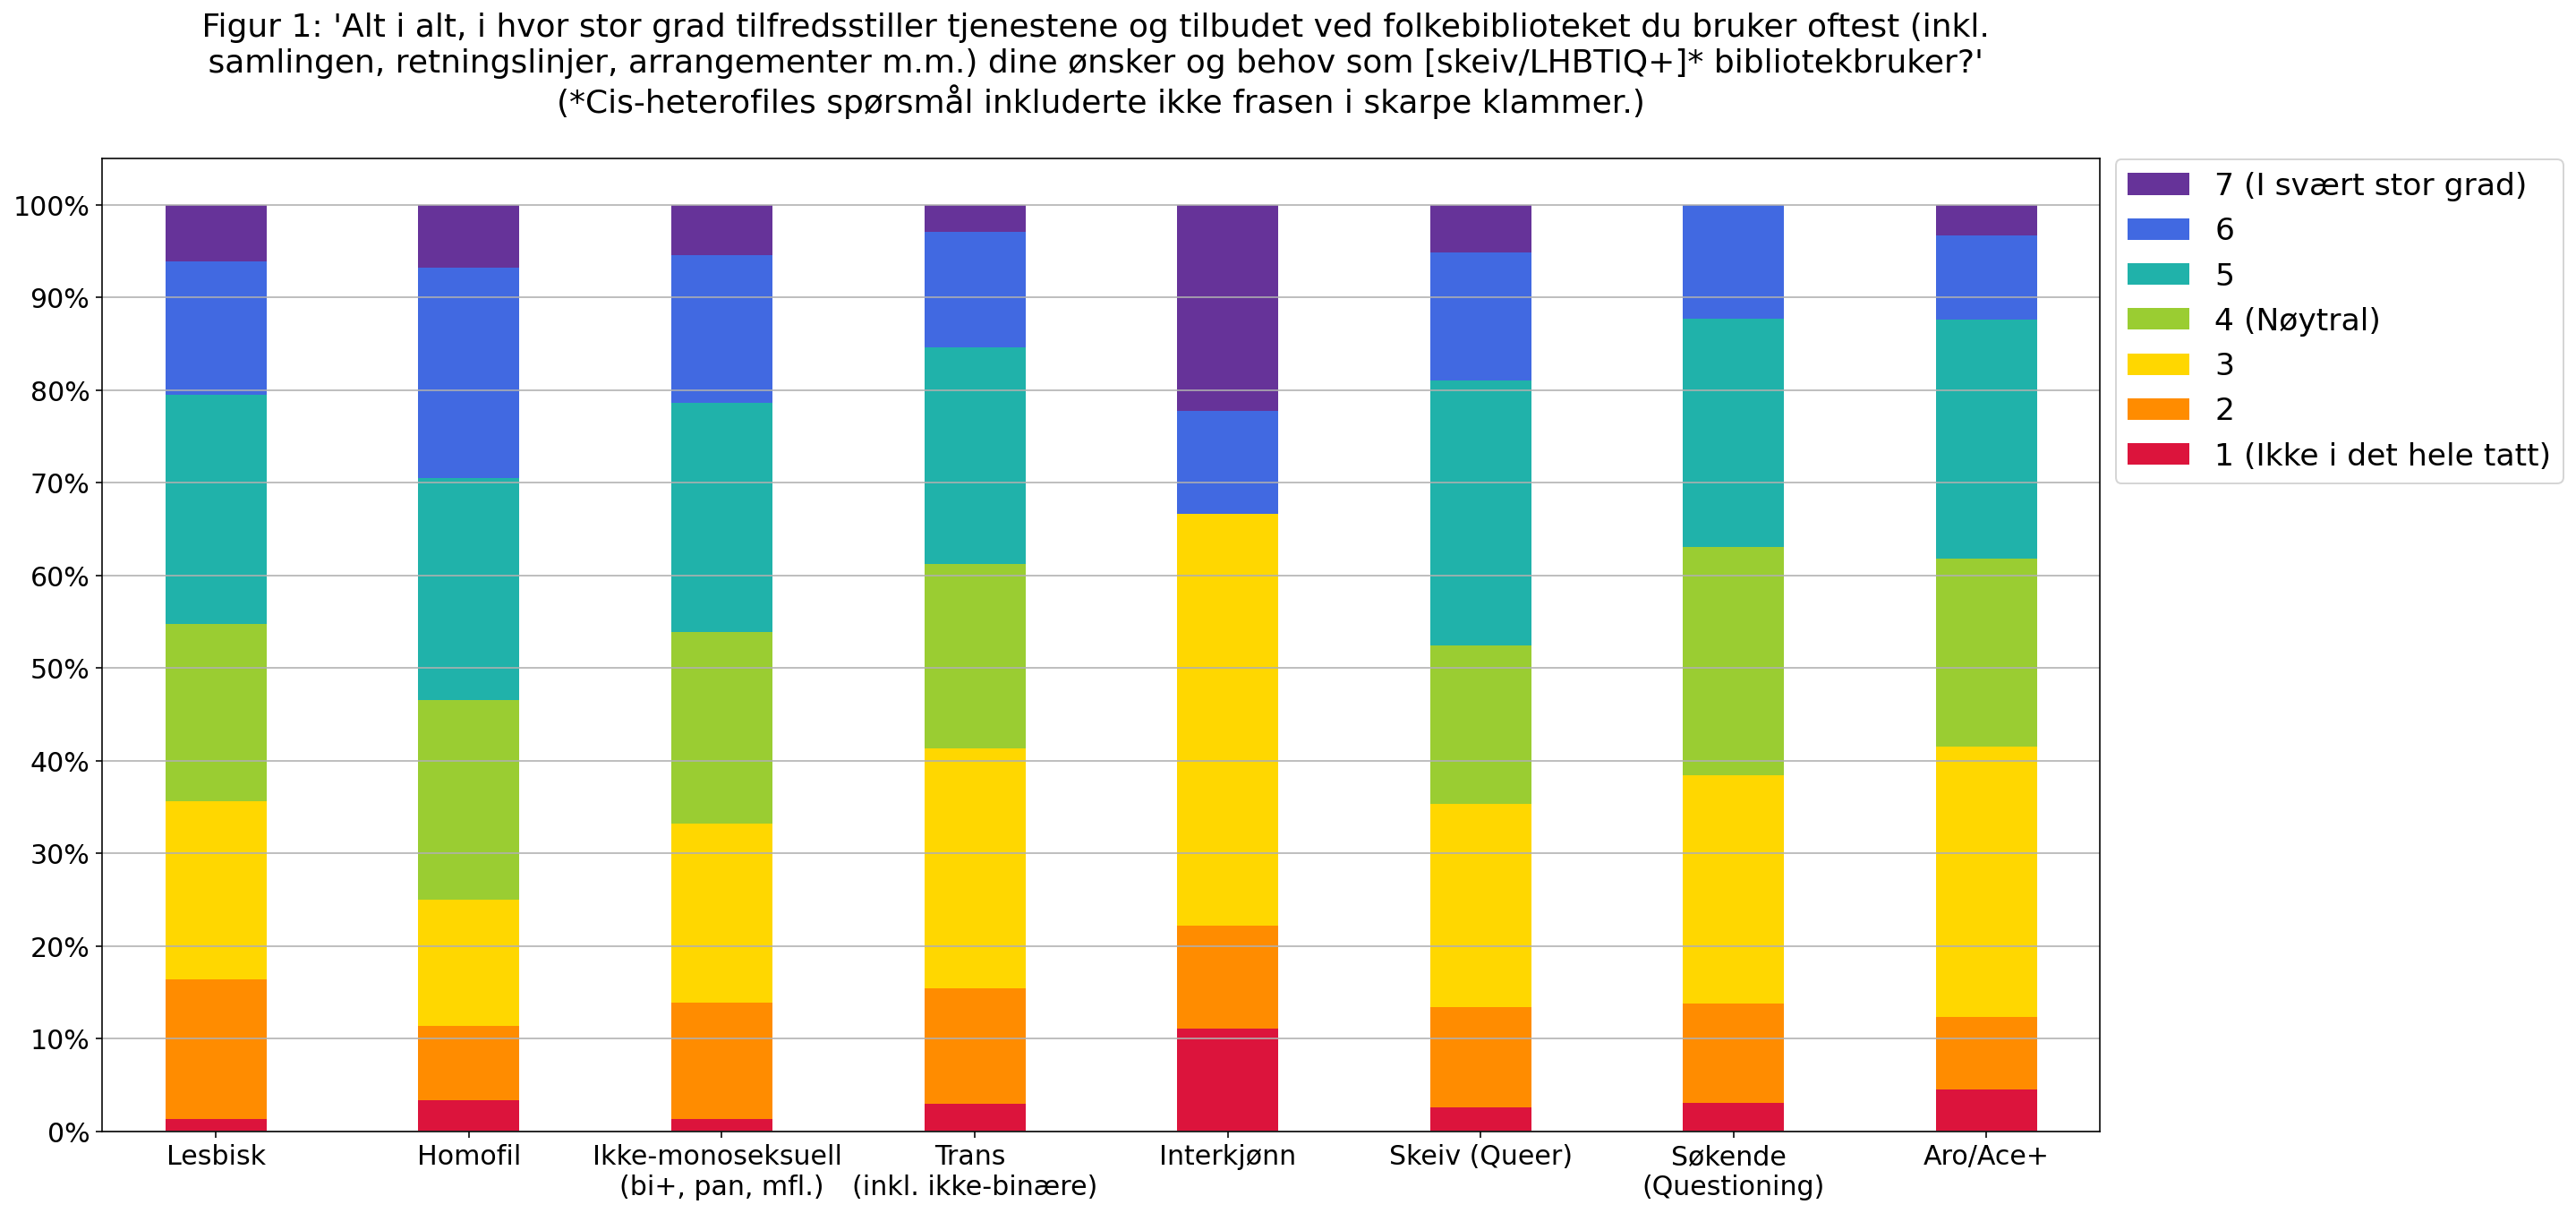

In [49]:
plot_group_tilfredshet(LGBTQIA_groups, plot_all=False, rotation=0)
plt.title(" Figur 1: 'Alt i alt, i hvor stor grad tilfredsstiller tjenestene og tilbudet ved folkebiblioteket du bruker oftest (inkl.  \n samlingen, retningslinjer, arrangementer m.m.) dine ønsker og behov som [skeiv/LHBTIQ+]* bibliotekbruker?'  \n  (*Cis-heterofiles spørsmål inkluderte ikke frasen i skarpe klammer.)  \n")
plt.savefig("Overall tilfredshet.pdf", bbox_inches="tight")


<span style="color:#55CDFC; font-size:1.5em">**Interaktiv:**</span>

#### Klikk på de tre prikkene over figuren. I kodecellen, bytt ut <code>overall_groups</code> med en av de andre grupperingene under for en ny visualisering. Trykk SKIFT + ENTER for å kjøre cellen på nytt. 

<br><code>overall_groups</code> (alle cis-heterofile respondenter vs alle skeive respondenter)
<br><code>chcsts</code> (alle cis-heterofile respondenter vs. alle ciskjønnede skeive respondenter vs. alle transkjønnede skeive respondenter)
<br><code>LGBTQIA_groups</code> (alle skeive respondenter gruppert etter bokstaver i LHBTIQ+-akronymet - NB gruppene overlapper!)
<br><code>orientation_groups</code> (alle skeive respondenter gruppert etter seksuell orientering)
<br><code>queer_cisness</code> (alle skeive respondenter gruppert etter ciskjønnethet)
<br><code>gender_groups</code> (alle skeive respondenter gruppert etter selvbestemt kjønnsidentitet)
<br><code>mwct_groups</code> (binære skeive respondenter gruppert etter binær kjønnsidentitet og ciskjønnethet)
<br><code>gay_groups</code> (alle homofile respondenter gruppert etter kjønn)
<br><code>region_groups</code> (alle skeive respondenter gruppert etter region)








-----------------
# Representation Matters

### Q: "Generelt sett er det viktig for meg å kunne se meg selv og min [skeive/LHBTIQ+]* identitet gjenspeilet i bøker og andre medier."

*Cis-heterofiles spørsmål manglet frasen i skarpe klammer.

In [50]:
BIGGER_SIZE = 18
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=18) 
old_enighet(compare_rep_matters)
plt.title("Figur 1: 'Generelt sett er det viktig for meg å kunne se meg selv og min [skeive/LHBTIQ+]* identitet gjenspeilet \n i bøker og andre medier.'  (*Cis-heterofiles spørsmål inkluderte ikke frasen i skarpe klammer.)")
plt.savefig("Fig1.pdf", bbox_inches="tight")
plt.show()


NameError: name 'old_enighet' is not defined

In [ ]:
#Change the labels in the legend, formatting markdown cells

# Bibliotek som trygge rom

## 80% av cis-heterofile er svært enige i at de alltid føler seg velkommen og trygg på folkebibliotek vs. 57% av skeive. Likevel svarer majoriteten (67%) av skeive at de er litt eller svært enige i at sin skeive/LHBTIQ+ identitet spiller ingen rolle for hvor velkommen eller trygg de føler seg på biblioteket. 

### 67% av cis-heterofile er svært enige i at de "alltid kan være helt seg selv på biblioteket". Dette går opp til X for cis-heterofile som ikke har andre marginaliserte identiteter. Tilsvarende tall for cis skeive er 36%, og X for trans skeive brukere. 

In [ ]:
old_enighet(skeiv_trygge_rom)
plt.show()
old_enighet(cishetero_trygge_rom)
plt.show()

enighet(chcsts_df, ["Helt_meg_selv"])
#plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()
enighet(chcsts_df, ["Alltid_velkommen"])
plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()
enighet(Skeiv_ID_df, ["Rep_matters_B"])
plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()
enighet(chcsts_df, ["Bib_pleier_ha"])
plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()
enighet(intersectional_groups_df, ["Rep_matters_B"])
plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()

In [ ]:
nones = alle_skeive[alle_skeive.Cis=="NONE"]
nones.Spesifiser_Cis

In [ ]:
15/642

# Statistical tests

In [ ]:
def mannwhitneyu_norm(a, b):
    a = a.dropna()
    b = b.dropna()
    u, p = stats.mannwhitneyu(a, b, alternative='two-sided')
    return f'Common language effect size: {u / ( len(a) * len(b)):.1%}, p-value: {p}'

mannwhitneyu_norm(alle_skeive.Rep_matters_B, cis_heterofile.Rep_matters_B)

In [ ]:
def kruskal_wallis(group_dict, column_name):
    things_to_compare = []
    for group in group_dict.values():
        column = group[column_name].dropna().values
        things_to_compare.append(column)
    u, p = stats.mstats.kruskalwallis(*things_to_compare)
    return u, p

kruskal_wallis(Skeiv_ID, "Valgt_andre_bib")

In [ ]:
stats.mannwhitneyu(cis_heterofile.Bib_pleier_ha.dropna(), alle_skeive.Bib_pleier_ha.dropna())

In [ ]:
stats.mannwhitneyu(cis.Rep_matters_B.dropna(), tnb.Rep_matters_B.dropna(), alternative='two-sided')

In [ ]:
np.std(alle_skeive.Rep_matters_B.dropna())

In [ ]:
np.std(cis_heterofile.Rep_matters_B.dropna())

In [ ]:
mannwhitneyu_norm(cis_heterofile.Alltid_velkommen, alle_skeive.Alltid_velkommen)

In [ ]:
mannwhitneyu_norm(cis_heterofile.Helt_meg_selv, cis.Helt_meg_selv)

^ Analysis: Strong significant difference between the extent to which cishetero & trans queer people feel they can be 'entirely themselves' at the library. Moderate difference between cishet & cis queer, moderate difference between cis queer & trans queer. 

In [ ]:
mannwhitneyu_norm(SE_skeiv.Valgt_andre_bib, SU_skeiv.Valgt_andre_bib)

In [ ]:
sum(df.Seksuell_orientering.str.contains("Bi"))

In [ ]:
stats.mannwhitneyu(cis.Overall_tilfredshet, tnb.Overall_tilfredshet)

In [ ]:
na = len(alle_skeive.Overall_tilfredshet.dropna())
nb = len(cis_heterofile.Overall_tilfredshet.dropna())
nc = len(tnb.Overall_tilfredshet.dropna())
nd = len(cis.Overall_tilfredshet.dropna())
std = np.sqrt(((na * nb) * (na + nb + 1))/(na + nb))
na, nb, std

In [ ]:
Z = abs((na*nb - ((na + nb)/2))/std)
Z

In [ ]:
print((32167.5/(nc * nd))-1)
mannwhitneyu_norm(cis.Overall_tilfredshet, tnb.Overall_tilfredshet)

In [ ]:
Z/np.sqrt(na+nb)

In [ ]:
np.std(cis_heterofile.Overall_tilfredshet)

In [ ]:
stats.mannwhitneyu(skeiv_df[skeiv_df.Deichman].Overall_tilfredshet, skeiv_df[~skeiv_df.Urban].Overall_tilfredshet, alternative='two-sided')

In [ ]:
mannwhitneyu_norm(ts_min.Rep_matters_B, ch_maj.Rep_matters_B)

In [ ]:
mannwhitneyu_norm(s_Age_16_29.Rep_matters_B, s_Age_60_plus.Rep_matters_B)

In [ ]:
mannwhitneyu_norm(cis_heterofile.Overall_tilfredshet, alle_skeive.Overall_tilfredshet)

In [ ]:
mannwhitneyu_norm(cis.Helt_meg_selv, tnb.Helt_meg_selv)

In [ ]:
mannwhitneyu_norm(cis.Bib_pleier_ha, tnb.Bib_pleier_ha)

In [ ]:
mannwhitneyu_norm(cis.Valgt_andre_bib, tnb.Valgt_andre_bib)

In [ ]:
mannwhitneyu_norm(cis.Utvalg_KID, tnb.Utvalg_KID)

In [ ]:
mannwhitneyu_norm(cis_heterofile.Utvalg_KID, alle_skeive.Utvalg_KID)

^^Analysis: Bigger difference between cis & non-cis queer people than between cishetero & all queer people (are there other questions where this is true?

In [ ]:
mannwhitneyu_norm(intersex_plus.Utvalg_KID, tnb.Utvalg_KID)

In [ ]:
stats.mstats.kruskalwallis(s_Sørlandet.Overall_tilfredshet.dropna().values, s_Østlandet.Overall_tilfredshet.dropna().values, s_Vestlandet.Overall_tilfredshet.dropna().values, s_Midt_Norge.Overall_tilfredshet.dropna().values, s_Nord_Norge.Overall_tilfredshet.dropna().values)

In [ ]:
brunnermunzel_test(SE_skeiv.Valgt_andre_bib.dropna(), SU_skeiv.Valgt_andre_bib.dropna(), ttype=0, alpha=0.05)

In [ ]:
brunnermunzel_test(ts_min.Alltid_velkommen.dropna(), ch_maj.Alltid_velkommen.dropna(), ttype=0, alpha=0.05)

In [ ]:
kruskal_wallis(s_age_groups, "Trygge_rom_gen_B")

In [ ]:
kruskal_wallis(LG_groups, "Rep_matters_B")

In [ ]:
print(mannwhitneyu_norm(cis.utrygt, tnb.utrygt))
print(mannwhitneyu_norm(cis_women.utrygt, trans_women.utrygt))
print(mannwhitneyu_norm(trans_women.utrygt, cis_women.utrygt))
print(mannwhitneyu_norm(s_Age_16_29.utrygt, s_Age_60_plus.utrygt))
kruskal_wallis(s_age_groups, "utrygt")

^Analysis: significant difference in how unsafe (pair) feel at the library
- cis & non-cis queer people (big)
- cis women & trans women, cis men & trans men (no diff for trans women & trans men or cis women & cis men)
- 

In [ ]:
enighet(s_age_df, ["utrygt"])

In [ ]:
mannwhitneyu_norm(cis_heterofile.Bruk, alle_skeive.Bruk)

In [ ]:
ch_user_frac = len(cis_heterofile[cis_heterofile.Bruk == True])/len(cis_heterofile)
s_user_frac = len(alle_skeive[alle_skeive.Bruk == True])/len(alle_skeive)
ch_past_year_frac = len(cis_heterofile[cis_heterofile.Sist_besok_måneder >3])/len(cis_heterofile)
s_past_year_frac = len(alle_skeive[alle_skeive.Sist_besok_måneder >3])/len(alle_skeive)
ch_past_3m_frac = len(cis_heterofile[cis_heterofile.Sist_besok_måneder >4])/len(cis_heterofile)
s_past_3m_frac = len(alle_skeive[alle_skeive.Sist_besok_måneder >4])/len(alle_skeive)
print(len(cis_heterofile[cis_heterofile.Bruk == False]), len((alle_skeive[alle_skeive.Bruk == False])))
print (f"{s_user_frac:.1%} of queer respondents and {ch_user_frac:.1%} of non-queer respondents were categorized as library users")
print(f"{s_past_year_frac:.1%} of queer respondents and {ch_past_year_frac:.1%} of non-queer respondents report having used the public library in the past year")
print(f"{s_past_3m_frac:.1%} of queer respondents and {ch_past_3m_frac:.1%} of non-queer respondents report having used the public library in the past three months")

^ Analysis: Numbers of respondents who are categorized as non-users are too small to allow for robust testing of statistical significance (N = 35 queer and 16 non-queer users)

In [ ]:

alt.Chart(chcsts_df).mark_bar().encode(
    x="group",
    color=alt.Color(
        "Hyppighet",
        sort=sorted(
            Hyppighet_map,
            key=Hyppighet_map.get,
        reverse=True),
        scale=alt.Scale(scheme="spectral"),
    ),
    order=alt.Order("Hyppighet_n"),
    y=alt.Y("count()", stack="normalize"),
)


In [ ]:
plot_some_lines_and_bars_too(bruk_df, "Trygge_rom_gen_all")

In [ ]:
alle_skeive.Pavirket_oppfatning_B.value_counts()

In [ ]:
alle_skeive.Kjenner_til_SIAN_B.value_counts()

In [ ]:
296/(296+175)

'Mer_skj_item',
 'Mer_skj_skaper',
 'Mer_skj_mangfold',
 'Mer_faglitt',
 'Mer_BU',
 'Bedre_gjenfinning',
 'Info',
 'Kompetanseheving',
 'Apne_ansatte',
 'Tredje_KI',
 'Selvbestemt_KID',
 'Endre_KID',
 'Toaletter',
 'Pronomen_bruk',
 'Nulltoleranse',
 'Skilting',

In [ ]:
print("Importance of 'safe space', rainbow flag, or other signage in the physical library space (-2 to +2):")
print("All:", round(np.mean(alle_skeive.Skilting), 2))
print("Lesbian:", round(np.mean(lesbian.Skilting), 2))
print("Gay:", round(np.mean(gay.Skilting), 2))
print("Bi+:", round(np.mean(bi_plus.Skilting), 2))
print("Trans:", round(np.mean(tnb.Skilting), 2))
print("Queer+:", round(np.mean(q_plus.Skilting), 2))
print("Intersex+:", round(np.mean(intersex_plus.Skilting), 2))
print("Ace+:", round(np.mean(ace_plus.Skilting), 2))

#AskMin or Becca why isn't Kruskal-Wallis giving the same p value as Mann-Whitney / why are they evaluating significance differently?

print("Kruskal-Wallis test:", kruskal_wallis(LGBTQIA_groups, "Skilting"))
print("Mann-Whitney U test:", mannwhitneyu_norm(gay.Skilting, q_plus.Skilting))

In [ ]:
importance = {'Mer_skj_item' : "More books or other media for adults with queer characters and themes",
    'Mer_skj_skaper' : "More books or other media written/created by queer/LGBTQIA+ people",
    'Mer_skj_mangfold' : "More focus on other aspects of diversity and inclusion in the queer media the library has available",
    'Mer_faglitt' : "More or better nonfiction materials with information about queer/LGBTQIA+ identities or issues",
    'Mer_BU' : "More children's or young adult (YA) materials with 'rainbow families' or queer characters and/or themes",
    'Bedre_gjenfinning' : "Better options for easily locating queer media using the library's website or catalog search",
    'Info' : "Flyers, brochures, or other information about local queer community groups or resources for queer/LGBTQIA+ people",
    'Kompetanseheving' : "Professional development or training for library employees on LGBTQIA+ topics and/or how to interact with queer/LGBTQIA+ library users",
    'Apne_ansatte' : "Openly queer/LGBTQIA+ library employees",
    'Tredje_KI' : "More options than 'man' or 'woman' on library cards",
    'Selvbestemt_KID' : "The ability to write in your own gender and/or pronouns when you first get a library card",
    'Endre_KID' : "The ability to easily change the gender and/or pronouns on your library card",
    'Toaletter' : "Accessible, gender-neutral bathrooms at the library",
    'Pronomen_bruk' : "Use of gender-neutral pronouns as standard in interactions with library users",
    'Nulltoleranse' : "A clear zero-tolerance policy for harassment, discrimination or hate speech at the library",
    'Skilting' : "'Safe space' signs or rainbow-, trans-, or other pride flags visibly displayed at the library",        
}

none_brukere = s_brukere[s_brukere.Cis == "NONE"]

dataframes_dict = {
    "Trans- & ikke-binære brukere" : tnb_brukere,
    "Søkende/usikker brukere" : su_brukere,
    "Cis LHBQA+ brukere" : cs_brukere,
    "ikke-kategoriserbare brukere" : none_brukere,
    "Alle LHBTIQ+ brukere" : s_brukere,    
   # "Those who don't use the word cis" : s_brukere[s_brukere.Cis == "NONE"]
}


nonuser_df = {
    "Alle LHBTIQ+ ikke-brukere" : s_ikke_brukere,
    #"Alle cis LHBQA+ ikke-brukere" : cs_ikke_brukere,
    #"Trans-, ikke-binære og \nsøkende/usikker ikke-brukere" : tnb_plus_ikke_brukere,
    
}

def importance_means(dataframes):
    means = []    
    for column_name in importance.keys():
        row = []
        for dataframe in dataframes.values():
            row.append(round(dataframe[column_name].mean(), 2))
        means.append(row)
        
    mean_df = pd.DataFrame(means, index=importance.values(), columns=dataframes.keys())
    return mean_df
        
nonuser_mean_df = importance_means(nonuser_df)
len(tnb_brukere)
print(len(s_brukere)) 
print(len(cs_brukere), len(tnb_brukere), len(su_brukere))
print((len(cs_brukere) + len(tnb_brukere) + len(su_brukere) + len(none_brukere)))
nonuser_mean_df.sort_values("Alle LHBTIQ+ ikke-brukere", ascending=False)
#for column in mean_df.columns:
#AskMin what's up - compare rating on 'More options than man or woman on library cards with tnb vs tnb_brukere'

In [ ]:
nonuser_mean_df = importance_means(dataframes_dict_IB)

nonuser_mean_df.sort_values("Trans & nonbinary non-users", ascending=False)

In [ ]:
mannwhitneyu_norm(tnb_ikke_brukere.Bedre_gjenfinning, s_brukere.Bedre_gjenfinning)

In [ ]:
all_importance = [(round(np.mean(alle_skeive.Skilting), 2), "Skilting"), 
                    (round(np.mean(alle_skeive.Nulltoleranse), 2), "Nulltoleranse"), 
                    (round(np.mean(alle_skeive.Pronomen_bruk), 2), "Gender neutral pronouns"),
                    (round(np.mean(alle_skeive.Toaletter), 2), "Toaletter"),
                    (round(np.mean(alle_skeive.Mer_skj_item), 2), "More queer materials (content)"),
                    (round(np.mean(alle_skeive.Mer_skj_skaper), 2), "More queer materials (creator)"),
                    (round(np.mean(alle_skeive.Mer_skj_mangfold), 2), "More diversity within queer materials"),
                    (round(np.mean(alle_skeive.Mer_faglitt), 2), "More queer nonfiction"),
                    (round(np.mean(alle_skeive.Mer_BU), 2), "More queer materials for children & youth"),
                    (round(np.mean(alle_skeive.Bedre_gjenfinning), 2), "Easier to locate queer materials"),
                    (round(np.mean(alle_skeive.Info), 2), "Flyers/brochures etc"),
                    (round(np.mean(alle_skeive.Kompetanseheving), 2), "Kompetanseheving"),
                    (round(np.mean(alle_skeive.Apne_ansatte), 2), "Openly queer employees"),
                    (round(np.mean(alle_skeive.Tredje_KI), 2), "Third gender option on library cards"),
                    (round(np.mean(alle_skeive.Selvbestemt_KID), 2), "Ability to enter own gender when getting library card"),
                    (round(np.mean(alle_skeive.Endre_KID), 2), "Ability to change gender on library card"),
                 ]
print(sorted(all_importance))

In [ ]:
trans_importance = [(round(np.mean(tnb.Skilting), 2), "Skilting"), 
                    (round(np.mean(tnb.Nulltoleranse), 2), "Nulltoleranse"), 
                    (round(np.mean(tnb.Pronomen_bruk), 2), "Gender neutral pronouns"),
                    (round(np.mean(tnb.Toaletter), 2), "Toaletter"),
                    (round(np.mean(tnb.Mer_skj_item), 2), "More queer materials (content)"),
                    (round(np.mean(tnb.Mer_skj_skaper), 2), "More queer materials (creator)"),
                    (round(np.mean(tnb.Mer_skj_mangfold), 2), "More diversity within queer materials"),
                    (round(np.mean(tnb.Mer_faglitt), 2), "More queer nonfiction"),
                    (round(np.mean(tnb.Mer_BU), 2), "More queer materials for children & youth"),
                    (round(np.mean(tnb.Bedre_gjenfinning), 2), "Easier to locate queer materials"),
                    (round(np.mean(tnb.Info), 2), "Flyers/brochures etc"),
                    (round(np.mean(tnb.Kompetanseheving), 2), "Kompetanseheving"),
                    (round(np.mean(tnb.Apne_ansatte), 2), "Openly queer employees"),
                    (round(np.mean(tnb.Tredje_KI), 2), "Third gender option on library cards"),
                    (round(np.mean(tnb.Selvbestemt_KID), 2), "Ability to enter own gender when getting library card"),
                    (round(np.mean(tnb.Endre_KID), 2), "Ability to change gender on library card"),
                 ]

print(sorted(trans_importance))

In [ ]:
cis_importance = [(round(np.mean(cis.Skilting), 2), "Skilting"), 
                    (round(np.mean(cis.Nulltoleranse), 2), "Nulltoleranse"), 
                    (round(np.mean(cis.Pronomen_bruk), 2), "Gender neutral pronouns"),
                    (round(np.mean(cis.Toaletter), 2), "Toaletter"),
                    (round(np.mean(cis.Mer_skj_item), 2), "More queer materials (content)"),
                    (round(np.mean(cis.Mer_skj_skaper), 2), "More queer materials (creator)"),
                    (round(np.mean(cis.Mer_skj_mangfold), 2), "More diversity within queer materials"),
                    (round(np.mean(cis.Mer_faglitt), 2), "More queer nonfiction"),
                    (round(np.mean(cis.Mer_BU), 2), "More queer materials for children & youth"),
                    (round(np.mean(cis.Bedre_gjenfinning), 2), "Easier to locate queer materials"),
                    (round(np.mean(cis.Info), 2), "Flyers/brochures etc"),
                    (round(np.mean(cis.Kompetanseheving), 2), "Kompetanseheving"),
                    (round(np.mean(cis.Apne_ansatte), 2), "Openly queer employees"),
                    (round(np.mean(cis.Tredje_KI), 2), "Third gender option on library cards"),
                    (round(np.mean(cis.Selvbestemt_KID), 2), "Ability to enter own gender when getting library card"),
                    (round(np.mean(cis.Endre_KID), 2), "Ability to change gender on library card"),
                 ]

print(sorted(cis_importance, reverse=True))
mylist = sorted(cis_importance, reverse=True)
item = (round(np.mean(cis.Mer_faglitt), 2), "More queer nonfiction")
#search for the item
index = mylist.index(item)

print('The index of', item, 'in the list is:', (index +1))

In [ ]:
s_brukere[s_brukere.Cis == "NONE"]

In [ ]:
'Mer_skj_item', 
'Mer_skj_skaper', 
'Mer_skj_mangfold', 
'Mer_faglitt', 
'Mer_BU', 
'Bedre_gjenfinning', 
'Info', 
'Kompetanseheving', 
'Apne_ansatte', 
'Tredje_KI',
'Selvbestemt_KID', 
'Endre_KID', 
'Toaletter', 
'Pronomen_bruk', 
'Nulltoleranse', 
'Skilting',



print(round(np.mean(alle_skeive.Skilting), 2), "Skilting"),
print(round(np.mean(alle_skeive.Nulltoleranse), 2), "Nulltoleranse"),
print(round(np.mean(alle_skeive.Pronomen_bruk), 2), "Use of gender neutral pronouns"),
print(round(np.mean(alle_skeive.Toaletter), 2), "Gender neutral toilets")

In [ ]:
def andre_bib(group, groupname="text"):
    group = group.Valgt_andre_bib.dropna()
    print(groupname, "{:.1%}".format(sum(group)/len(group)))

andre_bib(lesbian, groupname=("lesbian respondents who chose another library:"))

In [ ]:
def andre_bib(group, groupname="groupname"):
    group = group.Valgt_andre_bib.dropna()
    print(groupname, "users:", "{:.1%}".format(sum(group)/len(group)))

def andre_bib_groups(groups):
    print("Percent of users who have chosen another library for reasons related to their queer identity:")
    for groupname, group in groups.items():
        andre_bib(group, groupname)

andre_bib_groups(LGBTQIA_groups)

In [ ]:
andre_bib_groups(s_age_groups)
andre_bib_groups(s_urban_groups)

print(kruskal_wallis(LGBTQIA_groups, "Valgt_andre_bib"),
kruskal_wallis(n_orientations, "Valgt_andre_bib"))

In [ ]:
kj_valg_data = [18.9, 31.1, 41.1]
print(np.mean(kj_valg_data), np.std(kj_valg_data))

In [ ]:
rows = []
for groupname, group in LGBQA_groups.items():
    column = group.Valgt_andre_bib.dropna()
    rows.append(
        (groupname, column.mean(), len(column))
    )

rows

In [ ]:
orientation_weights_df = pd.DataFrame(rows, columns = ["group", "average", "number"])

In [ ]:
import statsmodels
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
weighted_stats = DescrStatsW(orientation_weights_df.average, weights=orientation_weights_df.number, ddof=0)
weighted_stats.mean, weighted_stats.std

In [ ]:
rows = []
for groupname, group in Skeiv_ID.items():
    column = group.Valgt_andre_bib.dropna()
    rows.append(
        (groupname, column.mean(), len(column))
    )

rows
gender_weights_df = pd.DataFrame(rows, columns = ["group", "average", "number"])
weighted_stats = DescrStatsW(gender_weights_df.average, weights=gender_weights_df.number, ddof=0)
weighted_stats.mean, weighted_stats.std

In [ ]:
rows = []
for groupname, group in gender_groups.items():
    column = group.Valgt_andre_bib.dropna()
    rows.append(
        (groupname, column.mean(), len(column))
    )

print(rows)
gender_weights_df = pd.DataFrame(rows, columns = ["group", "average", "number"])
weighted_stats = DescrStatsW(gender_weights_df.average, weights=gender_weights_df.number, ddof=0)
weighted_stats.mean, weighted_stats.std

In [ ]:
rows = []
for groupname, group in gender_groups.items():
    column = group.Bibs_ansvar.dropna()
    rows.append(
        (groupname, column.mean(), len(column))
    )

print(rows)
weights_df = pd.DataFrame(rows, columns = ["group", "average", "number"])
weighted_stats = DescrStatsW(weights_df.average, weights=weights_df.number, ddof=0)
weighted_stats.mean, weighted_stats.std

In [ ]:
#AskMin - is this 'relativt standardavvik' that should be reported in percent? https://no.wikipedia.org/wiki/Standardavvik

In [ ]:
len(nonbinary[nonbinary.Alltid_velkommen == 2.0])/len(nonbinary.Alltid_velkommen.dropna())

In [ ]:
young_tnb_min = tnb[(tnb.Alder=='45-60') & (tnb.Marginalisert_ident!="N")]

In [ ]:
len(young_tnb_min)

In [ ]:
len(young_tnb_min[young_tnb_min.Helt_meg_selv == 2.0])/len(young_tnb_min.Helt_meg_selv.dropna())

In [ ]:
ynbr = young_nb[young_nb.Urban == False]
len(ynbr)

In [ ]:
len(ynbr[ynbr.Alltid_velkommen == 2.0])/len(ynbr.Alltid_velkommen.dropna())

In [ ]:
brunnermunzel_test(cis.Valgt_andre_bib.dropna(), tnb_plus.Valgt_andre_bib.dropna(), ttype=0, alpha=0.05)

In [ ]:
62-46

In [ ]:
not_bibs_ansvar = alle_skeive[alle_skeive.Bibs_ansvar==-2.0]

In [ ]:
not_bibs_ansvar.Rep_matters_all.dropna()


In [ ]:
np.mean(not_bibs_ansvar.Rep_matters_all.dropna())

analysis: Those who don't feel that this is the library's job are much less likely to feel that representation is important

In [ ]:
brunnermunzel_test(cis.m_med_respekt.dropna(), tnb_plus.m_med_respekt.dropna(), ttype=0, alpha=0.05)

In [ ]:
brunnermunzel_test(s_D.utrygt.dropna(), ch_R.utrygt.dropna(), ttype=0, alpha=0.05)

In [ ]:
sum(intersex_plus.Valgt_andre_bib.dropna() == True)/len(intersex_plus)

In [ ]:
intersex.Valgt_andre_bib

In [ ]:
import seaborn as sns
data = overall_df
sns.lmplot(x='utrygt', y='Urban_rural', hue='survey', data=data, fit_reg=True, x_jitter=0.4, y_jitter=0.4)  

In [ ]:
#df[df.Overall_tilfredshet].to_numeric()

def pos_tilfredshet(group, groupname="groupname"):
    over_five = group.Overall_tilfredshet >= 5.0
    print(groupname, "users, Pos:", "{:.1%}".format(sum(over_five)/len(over_five)))

def neg_tilfredshet(group, groupname="groupname"):
    under_three = group.Overall_tilfredshet <= 3.0
    print("Neg:", "{:.1%}".format(sum(under_three)/len(under_three)))

def tilfredshet_groups(groups):
    print("Tilfredshet percentages:")
    for groupname, group in groups.items():
        pos_tilfredshet(group, groupname), neg_tilfredshet(group)

tilfredshet_groups(LGBTQIA_groups)

In [ ]:
print(
    f"pos: {df.Interaksjon_bibansatt_1.value_counts()} neg: {df.Interaksjon_bibansatt_2.value_counts()}")

In [ ]:
print("Pos ja Brukere:", len(df[df.Interaksjon_brukere_1 == "Y_Pos"]), "/", len(df[df.Interaksjon_brukere_1 == "Y_Pos"])/642)
print("Neg ja Brukere:", len(df[df.Interaksjon_brukere_2 == "Y_Neg"]), "/", len(df[df.Interaksjon_brukere_2 == "Y_Neg"])/642)
print("Hard nei Brukere:", len(df[df.Interaksjon_brukere_3 == "U"]), "/", len(df[df.Interaksjon_brukere_3 == "U"])/642)
print("Soft nei Brukere:", len(df[df.Interaksjon_brukere_4 == "N"]), "/", len(df[df.Interaksjon_brukere_4 == "N"])/642)

In [ ]:
print("Pos ja Ansatt:", len(df[df.Interaksjon_bibansatt_1 == "Y_Pos"]), "/", len(df[df.Interaksjon_bibansatt_1 == "Y_Pos"])/642)
print("Neg ja Ansatt:", len(df[df.Interaksjon_bibansatt_2 == "Y_Neg"]), "/", len(df[df.Interaksjon_bibansatt_2 == "Y_Neg"])/642)
print("Hard nei Ansatt:", len(df[df.Interaksjon_bibansatt_3 == "U"]), "/", len(df[df.Interaksjon_bibansatt_3 == "U"])/642)
print("Soft nei Ansatt:", len(df[df.Interaksjon_bibansatt_4 == "N"]), "/", len(df[df.Interaksjon_bibansatt_4 == "N"])/642)

In [ ]:
print("Ja feilkjønnet cis:", len(cis[cis.feilkjonnet == "Y"]), "/", len(cis[cis.feilkjonnet == "Y"])/len(cis))
print("Ja feilkjønnet trans:", len(tnb_plus[tnb_plus.feilkjonnet == "Y"]), "/", len(tnb_plus[tnb_plus.feilkjonnet == "Y"])/len(tnb_plus))
print("Ja antatt cis:", len(df[df.antatt_orientering == "Y"]), "/", len(df[df.antatt_orientering == "Y"])/len(cis))
print("Ja antatt trans:", len(tnb_plus[tnb_plus.antatt_orientering == "Y"]), "/", len(tnb_plus[tnb_plus.antatt_orientering == "Y"])/len(tnb_plus))